In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
# Import trainig data
df_sub = pd.read_csv('test_1zqHu22.csv')

# Print and check
df_sub

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840
...,...,...,...,...,...,...,...,...,...
11116,100314,26336,25,140,21,Male,Student,240,317
11117,100315,6772,8,100,19,Female,Student,280,628
11118,100316,2042,16,98,22,Male,Student,270,462
11119,100317,24626,8,16,33,Male,Other,280,628


In [3]:
# Import trainig data
df = pd.read_csv('train_0OECtn8.csv')

df

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13
...,...,...,...,...,...,...,...,...,...,...
89192,89193,23996,15,32,25,Male,Other,340,662,3.91
89193,89194,20466,20,47,31,Male,Other,240,892,3.56
89194,89195,13655,16,97,25,Male,Student,270,462,4.23
89195,89196,24840,9,18,35,Male,Working Professional,230,819,3.77


In [54]:
df.loc[df['user_id'] == 13655]

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
46701,46702,13655,15,32,25,Male,Student,340,662,3.77
64692,64693,13655,16,35,25,Male,Student,270,462,4.31
80743,80744,13655,32,92,25,Male,Student,330,714,2.48
86307,86308,13655,32,145,25,Male,Student,330,714,2.60
89194,89195,13655,16,97,25,Male,Student,270,462,4.23


In [4]:
# Check general info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89197 entries, 0 to 89196
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            89197 non-null  int64  
 1   user_id           89197 non-null  int64  
 2   category_id       89197 non-null  int64  
 3   video_id          89197 non-null  int64  
 4   age               89197 non-null  int64  
 5   gender            89197 non-null  object 
 6   profession        89197 non-null  object 
 7   followers         89197 non-null  int64  
 8   views             89197 non-null  int64  
 9   engagement_score  89197 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.8+ MB


* There are 10 feature columns:
    * 8 numerical data types
    * 2 object data type
* Total of 89196 data points
* Target varibale 'engagement_score' is continuous variable
* 'user_id', 'category_id' & 'video_id' are categorical data

In [5]:
# Get column names
print("Column names : ", df.columns.values)

Column names :  ['row_id' 'user_id' 'category_id' 'video_id' 'age' 'gender' 'profession'
 'followers' 'views' 'engagement_score']


In [6]:
# Check for null values
df.isnull().sum()

row_id              0
user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64

* There are no null values in the dataset

In [7]:
# Checking the stats for numerical features
df.describe()

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score
count,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000
mean,44599.000000,13881.909806,18.323733,77.715383,24.848616,252.460172,502.980268,3.487797
std,25749.100318,8005.582771,11.675154,48.469656,8.955535,46.094468,268.569482,0.863498
min,1.000000,1.000000,1.000000,1.000000,10.000000,160.000000,30.000000,0.000000
25%,22300.000000,6945.000000,8.000000,34.000000,18.000000,230.000000,229.000000,2.900000
50%,44599.000000,13892.000000,16.000000,76.000000,23.000000,240.000000,467.000000,3.710000
75%,66898.000000,20819.000000,26.000000,120.000000,32.000000,280.000000,714.000000,4.150000
max,89197.000000,27734.000000,47.000000,175.000000,68.000000,360.000000,1000.000000,5.000000


In [8]:
#checking the summary of the categorical features in train set
df.describe(include=['object'])

,gender,profession
count,89197,89197
unique,2,3
top,Male,Student
freq,52397,44638


In [9]:
#checking and plotting the unique values of features and its count of categorical columns
# 'row_id' is not being plotted

for i in range(1, 10):
    print("Unique elemnts (Train Set):",df.columns[i])
    print(df[df.columns[i]].unique())
    print("Number of unique elements (Train Set):",len(df[df.columns[i]].unique()))
    print()

Unique elemnts (Train Set): user_id
[19990  5304  1840 ... 27378 24273 11279]
Number of unique elements (Train Set): 27734

Unique elemnts (Train Set): category_id
[37 32 12 23 25  7  8  3  5 28 20 36 24 30 31  4  1 21 10 16 11 19 39 15
 43 26 34 13 42 18 44 45 29 27  9 17 40 14 38  6 35 41 46 22 33  2 47]
Number of unique elements (Train Set): 47

Unique elemnts (Train Set): video_id
[128 132  24 112 139  14 100   4 161  88  75  72  48 107 103  60  74  83
  87  16 151  99  15 102 129 119  13  51  38  35  22  76  45 116 109 146
   1  67  32  53 148 140  63 115 108 113  92  33 117 114  50  17   6 120
  49  20 136  86  58 165  59  97  46  62 104  26  71  29 123 167 163 125
 145  81  65 162  18  77  36  25   9 124  98  31  94  10  95 156  68  23
 135 105 133 111   8  37  34  11 168  41 142 157 138 149  96 150  30 134
  42  28  66  56 143 106  27 141  40  82  64   7 174 101 121 126  12 158
 144 131 147 137  61 164  84 155 172 171  44 122  43  19  47 110  69 173
 130   5 127  39  52  79 152

array([[<AxesSubplot:title={'center':'row_id'}>,
        <AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'category_id'}>],
       [<AxesSubplot:title={'center':'video_id'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'followers'}>],
       [<AxesSubplot:title={'center':'views'}>,
        <AxesSubplot:title={'center':'engagement_score'}>,
        <AxesSubplot:>]], dtype=object)

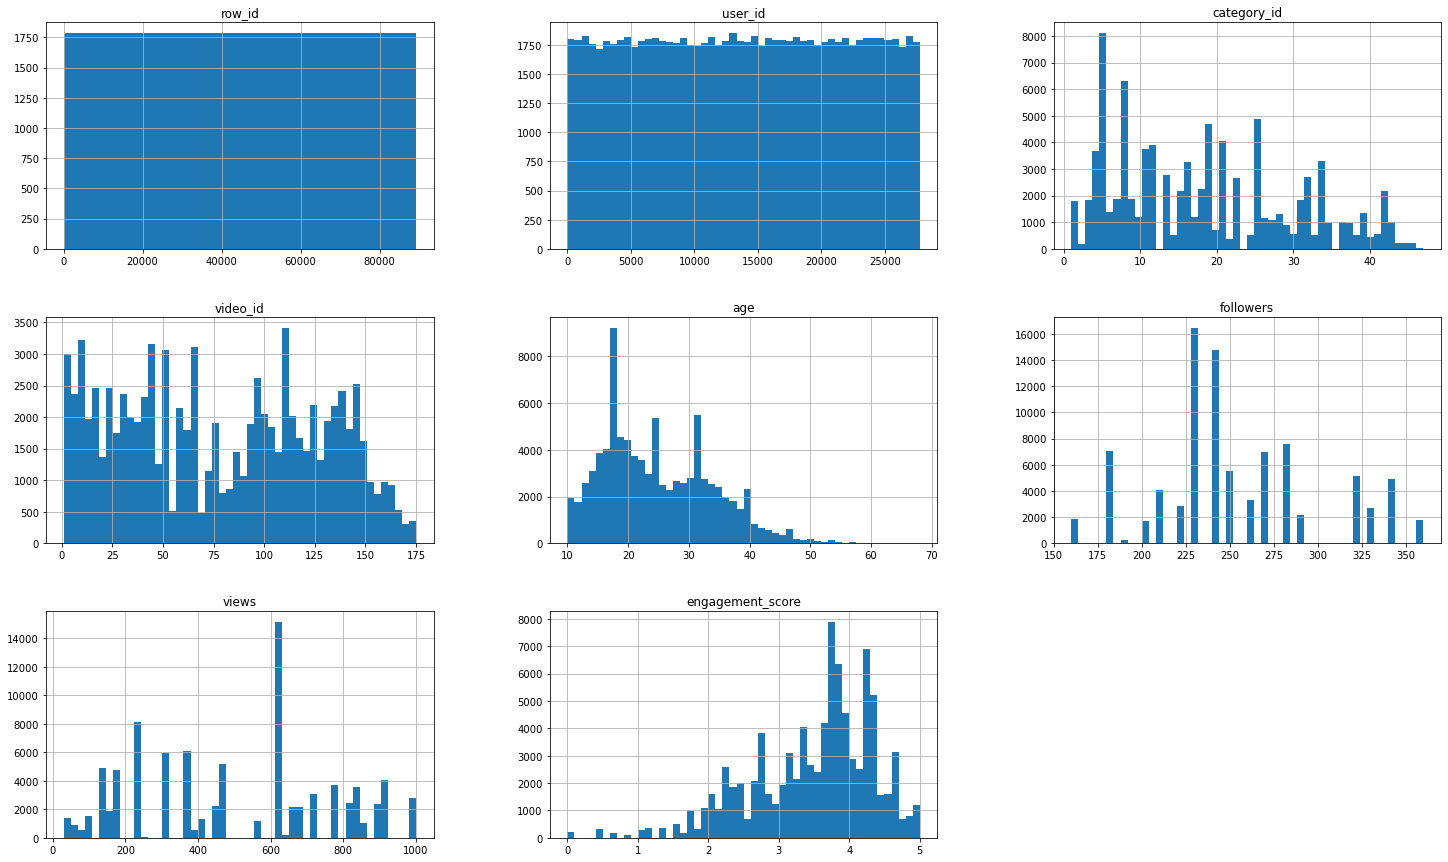

In [10]:
#creating histograms for each of the numerical features
df.hist(bins=50,figsize=(25,15))

<AxesSubplot:xlabel='views'>

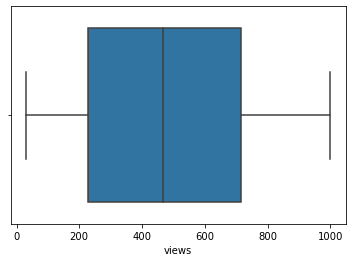

In [11]:
#visualizing the boxplot to see the outliers in 'views'
sns.boxplot(df["views"])

<AxesSubplot:xlabel='engagement_score'>

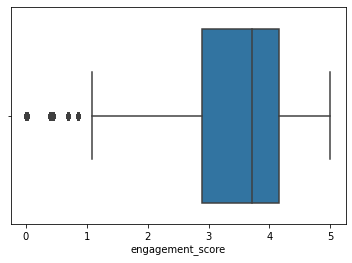

In [12]:
#visualizing the boxplot to see the outliers in 'engagement_score'
sns.boxplot(df["engagement_score"])

In [13]:
# Calculating IQR
Q1 = np.percentile(df['engagement_score'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['engagement_score'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

# Lower bound
lower = Q1-1.5*IQR

# Upper bound
upper = Q3+1.5*IQR

# Print the upper and lower limits
print('Lpper limit : ', lower)
print('Upper limit : ', upper)

Lpper limit :  1.0250000000000004
Upper limit :  6.025


In [14]:
# Getting datas under lower limit
lower_data = np.where(df['engagement_score'] <= lower)

# Number of data points less than lower limit
print('Number of data less than lower limit (engagement_score) : ', len(lower_data[0]))

Number of data less than lower limit (engagement_score) :  820


<AxesSubplot:ylabel='engagement_score'>

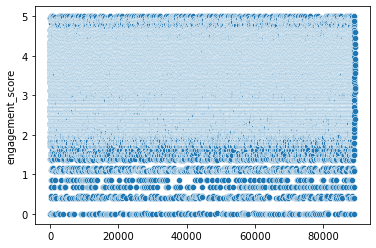

In [15]:
# Getting the scatter plot for 'engagement_score'
sns.scatterplot(x=df.index, y="engagement_score", data=df)

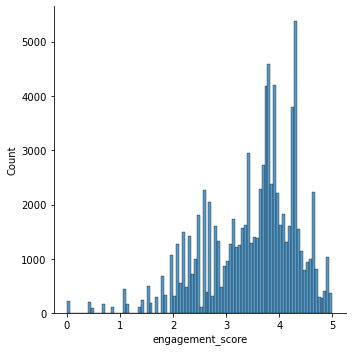

In [16]:
# Getting the distribution plot for 'engagement_score'
sns.displot(data=df, x="engagement_score")

<AxesSubplot:xlabel='age'>

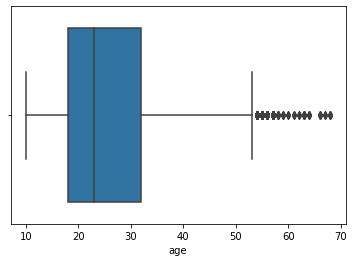

In [18]:
#visualizing the boxplot to see the outliers in 'engagement_score'
sns.boxplot(df["age"])

<AxesSubplot:xlabel='engagement_score'>

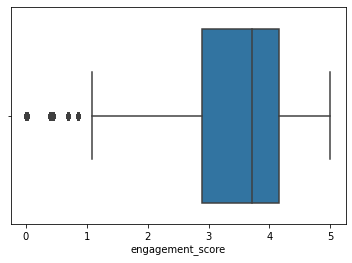

In [56]:
#visualizing the boxplot to see the outliers in 'engagement_score'
sns.boxplot(df["engagement_score"])

<AxesSubplot:xlabel='followers'>

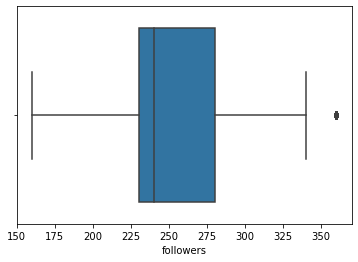

In [58]:
#visualizing the boxplot to see the outliers in 'engagement_score'
sns.boxplot(df["followers"])

In [19]:
# Calculating IQR
Q1 = np.percentile(df['age'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['age'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

# Lower bound
lower = Q1-1.5*IQR

# Upper bound
upper = Q3+1.5*IQR

# Print the upper and lower limits
print('Lpper limit : ', lower)
print('Upper limit : ', upper)

Lpper limit :  -3.0
Upper limit :  53.0


* Most of the viewers are betwen ages 10 - 53

In [20]:
# Copying dataset to new variable for feature engineering
df_wip = df.copy(deep=True)

# Droping the 
df_wip.drop(['row_id'], axis = 1, inplace=True)

# Print and check
df_wip

,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,19990,37,128,24,Male,Student,180,1000,4.33
1,5304,32,132,14,Female,Student,330,714,1.79
2,1840,12,24,19,Male,Student,180,138,4.35
3,12597,23,112,19,Male,Student,220,613,3.77
4,13626,23,112,27,Male,Working Professional,220,613,3.13
...,...,...,...,...,...,...,...,...,...
89192,23996,15,32,25,Male,Other,340,662,3.91
89193,20466,20,47,31,Male,Other,240,892,3.56
89194,13655,16,97,25,Male,Student,270,462,4.23
89195,24840,9,18,35,Male,Working Professional,230,819,3.77


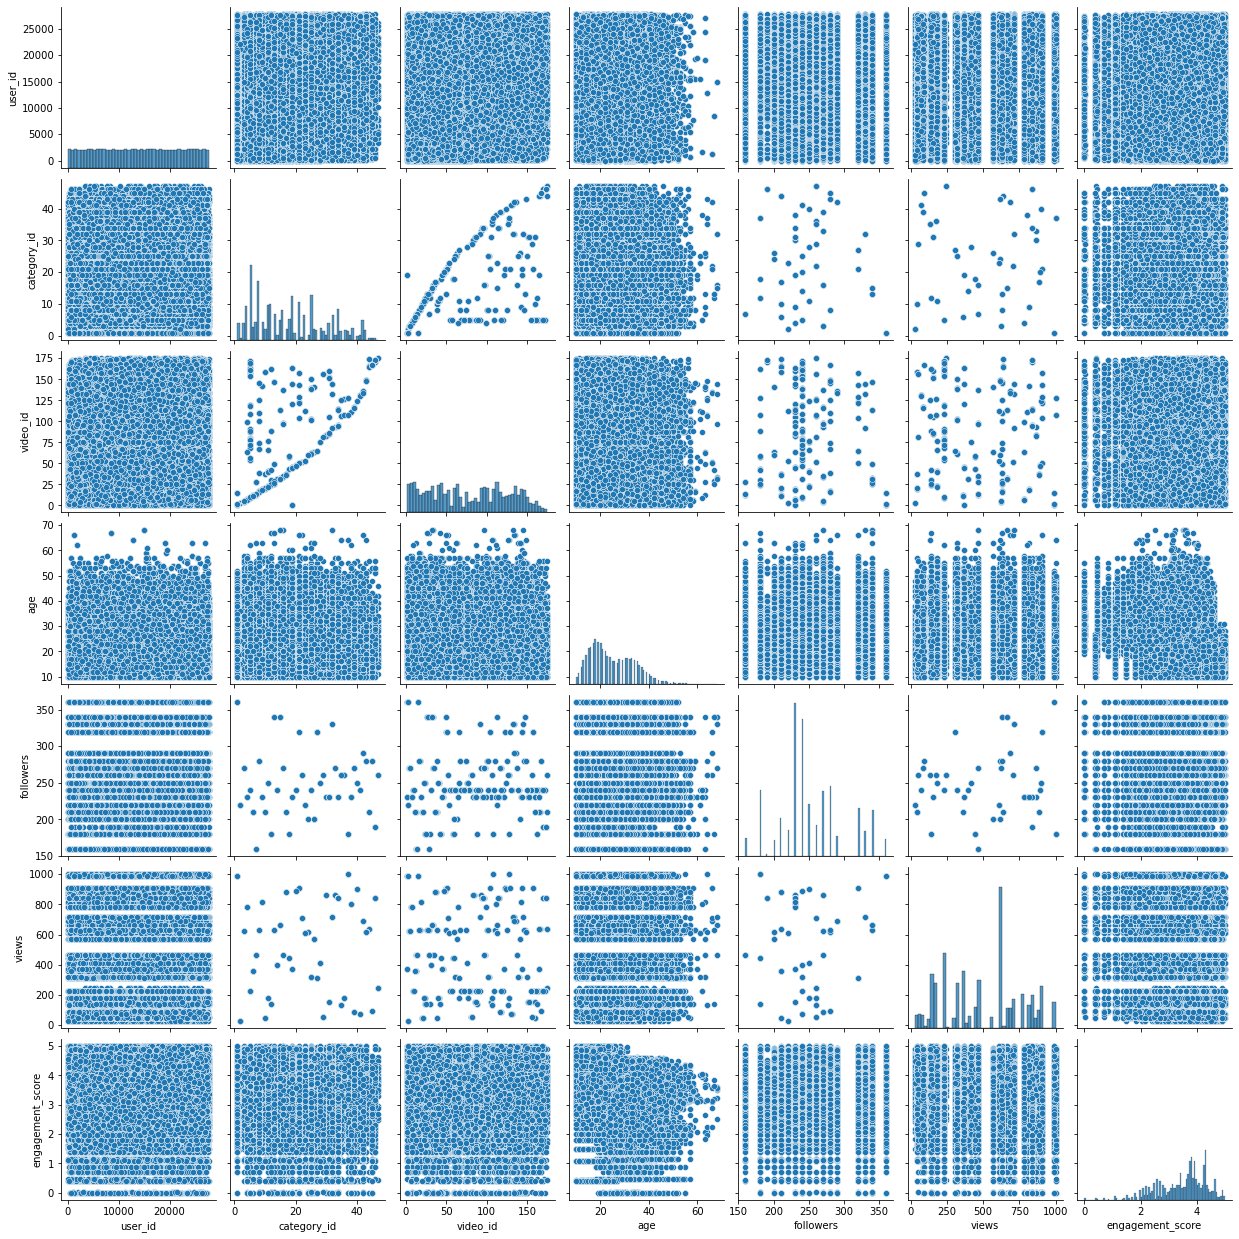

In [21]:
#scatter plots showing relationship of features can be seen
sns.pairplot(df_wip)

<AxesSubplot:>

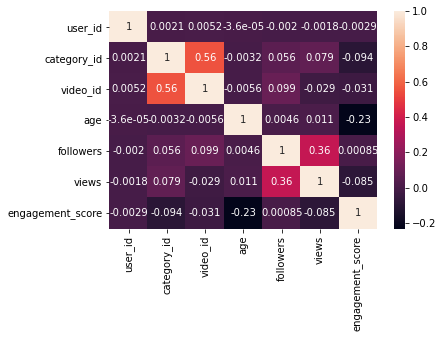

In [22]:
#heatmap of the correlation between variables are displayed
sns.heatmap(df_wip.corr(), annot=True)

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [41]:
# Define a function to one hot encode, standardize & split
def encode_standardize_split(df_input, cols):
    
    # Reseting index of input dataframe
    df_input = df_input.reset_index(drop=True)
    
    # creating one hot encoder object 
    onehotencoder = OneHotEncoder(drop='first')
    
    # define data
    data = df_input[cols]
    
    # Perform encoding
    data_encoded = onehotencoder.fit_transform(data).toarray()
    
    # Getting the new column names for one hot encoded data
    new_col = []
    for name in cols:
        unique_vals = df_input[name].unique()
        for count in range(len(unique_vals)-1):
            new_col.append(name +"_"+ str(count+1))
    
    # Generate encoded dataframe
    df_onehot = pd.DataFrame(data_encoded, columns = new_col)
    
    # Contact input dataframe with encoded dataframe
    df_input = pd.concat([df_input, df_onehot], axis=1)
    
    # Removing the orginial columns that were encoded
    df_input= df_input.drop(cols, axis=1)
    
    # Get target column data
    target_data = df_input['engagement_score']
    
    # Remove target column from dataframe
    df_input= df_input.drop(['engagement_score'], axis=1)
    
    # Get feature names
    feature_names = df_input.columns.values
    print("Feature column names : ", feature_names)
    print("\n")
    
    # Add the target data at last position of dataframe
    df_input['engagement_score'] = target_data
    
    # Creating an object of StandardScaler for performing our operations
    standardscaler = StandardScaler()

    # Extracting features
    features = df_input.iloc[:,:-1]

    # Extracting target
    target = df_input.iloc[:,-1:]

    # Transform data
    X = standardscaler.fit_transform(features)
    Y = standardscaler.fit_transform(target)
    
    # Splitting train and test
    x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.3, random_state=100)
    
    # Print the shape of train and validation
    print("Shape of x_train : ", x_train.shape)
    print("Shape of y_train : ", y_train.shape)
    print("Shape of x_val : ", x_val.shape)
    print("Shape of y_val : ", y_val.shape)
    
    # Return features and traget
    return x_train, x_val, y_train, y_val, standardscaler, feature_names

In [25]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import r2_score

In [26]:
# Function to Building Deep learning (ANN) model
def build_ANN():
    
    # initializing the model
    model = Sequential()
    
    # Layers
    model.add(Dense(units=128,activation='relu',kernel_initializer='uniform', input_dim = x_train.shape[1]))
    model.add(Dense(units=128, activation='relu', kernel_initializer='uniform'))
    model.add(Dense(units=64, activation='relu', kernel_initializer='uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(units=32, activation='relu', kernel_initializer='uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal', activation='linear'))

    # Compile model
    model.compile(optimizer="adam", loss='mean_squared_error', metrics='mse')
    
    # Return ANN model
    return model

In [27]:
# Listing the base model algorithms
base_algos = [LinearRegression(),  Ridge(), Lasso(), KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), XGBRegressor(), 'ANN']

# Listing the names of the base model algorithms
model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'K Neighbors Regressor', 'Decision Tree Regressor', 'Random Forest Regressor', 'AdaBoost Regressor', 'XGBoost Regressor', 'ANN Model']

In [28]:
def compare_models(base_algos, model_names):
    
    print("START...")
    
    # Initializing empty list to store the model metrics
    r2_score_train = []
    r2_score_val = []
    
    # Iterating over base algorithms
    for algo in base_algos:
        
        print("Running : ", algo)
        
        # Initializing model
        model = algo
        
        # Training model
        if model=='ANN':
            # Call ANN building function
            model = build_ANN()
            # Fitting ANN model
            model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size = 32, epochs = 50, verbose=0)
        else:
            model.fit(x_train, y_train)
        
        # Predicting for train values and calculaing R2 score
        train_pred = model.predict(x_train)
        r2_model_score = r2_score(y_train, train_pred)
        r2_score_train.append(r2_model_score)
    
        # Predicting for validation values and calculaing R2 score
        val_pred = model.predict(x_val)
        r2_model_score = r2_score(y_val, val_pred)
        r2_score_val.append(r2_model_score)
    
    # Creating a dataframe for model metrics
    df_eval = pd.DataFrame({'Model': model_names, 'Train R2 Score': r2_score_train, 'Test R2 Score': r2_score_val})
    
    print("Completed...!")
    
    # Return the model metrics
    return df_eval

In [32]:
# Performing preprocessing operations using function
x_train, x_val, y_train, y_val, standardscaler, _ = encode_standardize_split(df_wip, ['gender', 'profession'])

# Calling the function to compare base models
df_eval = compare_models(base_algos, model_names)

# Print and check
df_eval

Feature column names :  ['user_id' 'category_id' 'video_id' 'age' 'followers' 'views' 'gender_1'
 'profession_1' 'profession_2']


Shape of x_train :  (62437, 9)
Shape of y_train :  (62437, 1)
Shape of x_val :  (26760, 9)
Shape of y_val :  (26760, 1)
START...
Running :  LinearRegression()
Running :  Ridge()
Running :  Lasso()
Running :  KNeighborsRegressor()
Running :  DecisionTreeRegressor()
Running :  RandomForestRegressor()
Running :  AdaBoostRegressor()
Running :  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scal

,Model,Train R2 Score,Test R2 Score
0,Linear Regression,0.273314,2.700579e-01
1,Ridge Regression,0.273314,2.700580e-01
2,Lasso Regression,0.000000,-1.228395e-08
3,K Neighbors Regressor,0.508496,2.554327e-01
4,Decision Tree Regressor,1.000000,-1.308914e-01
5,Random Forest Regressor,0.909707,3.554878e-01
6,AdaBoost Regressor,0.230435,2.257682e-01
7,XGBoost Regressor,0.455236,3.660511e-01
8,ANN Model,0.378306,3.359025e-01


* Random Forest, XGBoost & ANN seems to perform almost similarly
* Base model XGBoost being the best out of the bunch

In [33]:
# One hot encoding 'category_id' along with 'gender' & 'profession'
x_train, x_val, y_train, y_val, standardscaler, _ = encode_standardize_split(df_wip, ['category_id', 'gender', 'profession'])

# Calling the function to compare base models
df_eval = compare_models(base_algos, model_names)

# Print and check
df_eval

Feature column names :  ['user_id' 'video_id' 'age' 'followers' 'views' 'category_id_1'
 'category_id_2' 'category_id_3' 'category_id_4' 'category_id_5'
 'category_id_6' 'category_id_7' 'category_id_8' 'category_id_9'
 'category_id_10' 'category_id_11' 'category_id_12' 'category_id_13'
 'category_id_14' 'category_id_15' 'category_id_16' 'category_id_17'
 'category_id_18' 'category_id_19' 'category_id_20' 'category_id_21'
 'category_id_22' 'category_id_23' 'category_id_24' 'category_id_25'
 'category_id_26' 'category_id_27' 'category_id_28' 'category_id_29'
 'category_id_30' 'category_id_31' 'category_id_32' 'category_id_33'
 'category_id_34' 'category_id_35' 'category_id_36' 'category_id_37'
 'category_id_38' 'category_id_39' 'category_id_40' 'category_id_41'
 'category_id_42' 'category_id_43' 'category_id_44' 'category_id_45'
 'category_id_46' 'gender_1' 'profession_1' 'profession_2']


Shape of x_train :  (62437, 54)
Shape of y_train :  (62437, 1)
Shape of x_val :  (26760, 54)
Shape 

,Model,Train R2 Score,Test R2 Score
0,Linear Regression,0.323024,3.208643e-01
1,Ridge Regression,0.323025,3.208566e-01
2,Lasso Regression,0.000000,-1.228395e-08
3,K Neighbors Regressor,0.510234,2.587525e-01
4,Decision Tree Regressor,1.000000,-1.291862e-01
5,Random Forest Regressor,0.909163,3.533652e-01
6,AdaBoost Regressor,0.229150,2.233461e-01
7,XGBoost Regressor,0.454168,3.647701e-01
8,ANN Model,0.374139,3.357354e-01


* Not much improvement after one hot encoding 'category_id'

In [34]:
# One hot encoding 'video_id' along with 'gender' & 'profession'
x_train, x_val, y_train, y_val, standardscaler, _ = encode_standardize_split(df_wip, ['video_id', 'gender', 'profession'])

# Calling the function to compare base models
df_eval = compare_models(base_algos, model_names)

# Print and check
df_eval

Feature column names :  ['user_id' 'category_id' 'age' 'followers' 'views' 'video_id_1'
 'video_id_2' 'video_id_3' 'video_id_4' 'video_id_5' 'video_id_6'
 'video_id_7' 'video_id_8' 'video_id_9' 'video_id_10' 'video_id_11'
 'video_id_12' 'video_id_13' 'video_id_14' 'video_id_15' 'video_id_16'
 'video_id_17' 'video_id_18' 'video_id_19' 'video_id_20' 'video_id_21'
 'video_id_22' 'video_id_23' 'video_id_24' 'video_id_25' 'video_id_26'
 'video_id_27' 'video_id_28' 'video_id_29' 'video_id_30' 'video_id_31'
 'video_id_32' 'video_id_33' 'video_id_34' 'video_id_35' 'video_id_36'
 'video_id_37' 'video_id_38' 'video_id_39' 'video_id_40' 'video_id_41'
 'video_id_42' 'video_id_43' 'video_id_44' 'video_id_45' 'video_id_46'
 'video_id_47' 'video_id_48' 'video_id_49' 'video_id_50' 'video_id_51'
 'video_id_52' 'video_id_53' 'video_id_54' 'video_id_55' 'video_id_56'
 'video_id_57' 'video_id_58' 'video_id_59' 'video_id_60' 'video_id_61'
 'video_id_62' 'video_id_63' 'video_id_64' 'video_id_65' 'video_id_6

,Model,Train R2 Score,Test R2 Score
0,Linear Regression,0.334432,3.309976e-01
1,Ridge Regression,0.334441,3.309787e-01
2,Lasso Regression,0.000000,-1.228395e-08
3,K Neighbors Regressor,0.491297,2.356287e-01
4,Decision Tree Regressor,1.000000,-1.433307e-01
5,Random Forest Regressor,0.907977,3.503667e-01
6,AdaBoost Regressor,0.157965,1.541983e-01
7,XGBoost Regressor,0.432269,3.493231e-01
8,ANN Model,0.401564,3.163411e-01


* Not much improvement after one hot encoding 'video_id'

In [35]:
# One hot encoding 'category_id' & 'video_id' along with 'gender' & 'profession'
x_train, x_val, y_train, y_val, standardscaler, _ = encode_standardize_split(df_wip, ['category_id', 'video_id', 'gender', 'profession'])

# Calling the function to compare base models
df_eval = compare_models(base_algos, model_names)

# Print and check
df_eval

Feature column names :  ['user_id' 'age' 'followers' 'views' 'category_id_1' 'category_id_2'
 'category_id_3' 'category_id_4' 'category_id_5' 'category_id_6'
 'category_id_7' 'category_id_8' 'category_id_9' 'category_id_10'
 'category_id_11' 'category_id_12' 'category_id_13' 'category_id_14'
 'category_id_15' 'category_id_16' 'category_id_17' 'category_id_18'
 'category_id_19' 'category_id_20' 'category_id_21' 'category_id_22'
 'category_id_23' 'category_id_24' 'category_id_25' 'category_id_26'
 'category_id_27' 'category_id_28' 'category_id_29' 'category_id_30'
 'category_id_31' 'category_id_32' 'category_id_33' 'category_id_34'
 'category_id_35' 'category_id_36' 'category_id_37' 'category_id_38'
 'category_id_39' 'category_id_40' 'category_id_41' 'category_id_42'
 'category_id_43' 'category_id_44' 'category_id_45' 'category_id_46'
 'video_id_1' 'video_id_2' 'video_id_3' 'video_id_4' 'video_id_5'
 'video_id_6' 'video_id_7' 'video_id_8' 'video_id_9' 'video_id_10'
 'video_id_11' 'video_

,Model,Train R2 Score,Test R2 Score
0,Linear Regression,0.332158,3.305454e-01
1,Ridge Regression,0.334441,3.309788e-01
2,Lasso Regression,0.000000,-1.228395e-08
3,K Neighbors Regressor,0.491296,2.356764e-01
4,Decision Tree Regressor,1.000000,-1.323373e-01
5,Random Forest Regressor,0.907968,3.461701e-01
6,AdaBoost Regressor,0.173519,1.680654e-01
7,XGBoost Regressor,0.432062,3.539829e-01
8,ANN Model,0.395606,3.406295e-01


* Not much improvement after one hot encoding 'category_id' & 'video_id'

## XGBoost Hyperparameter tuning

In [228]:
# One hot encoding 'category_id' & 'video_id' along with 'gender' & 'profession'
x_train, x_val, y_train, y_val, standardscaler, feature_names = encode_standardize_split(df_wip, ['gender', 'profession'])

Feature column names :  ['user_id' 'category_id' 'video_id' 'age' 'followers' 'views' 'gender_1'
 'profession_1' 'profession_2']


Shape of x_train :  (62437, 9)
Shape of y_train :  (62437, 1)
Shape of x_val :  (26760, 9)
Shape of y_val :  (26760, 1)


In [229]:
# Building XGBoost model
model = XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [230]:
# Predicting for train values and calculaing R2 score
train_pred = model.predict(x_train)
train_score = r2_score(y_train, train_pred)
print("Train Score :\t\t", train_score)
    
# Predicting for validation values and calculaing R2 score
val_pred = model.predict(x_val)
val_score = r2_score(y_val, val_pred)
print("Validation Score :\t", val_score)

Train Score :		 0.45704002128207766
Validation Score :	 0.36333494150717827


In [231]:
# Getting the parameters for the base model
xgb_param = model.get_xgb_params()

# Print and check
xgb_param

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'monotone_constraints': '()',
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [232]:
# Train and validation into inbuilt data format
xgb_train = xgb.DMatrix(x_train, label = y_train)
xgb_val = xgb.DMatrix(x_val, label = y_val)

# Getting cross validation result for base model
cv_folds=5
early_stopping_rounds=50

cv_result = xgb.cv(
    xgb_param,
    xgb_train, 
    num_boost_round=model.get_params()['n_estimators'], 
    nfold=cv_folds,
    metrics='mae', 
    early_stopping_rounds=early_stopping_rounds)

# Print and check
cv_result

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,0.721372,0.001054,0.722198,0.006410
1,0.670710,0.000635,0.672515,0.006793
2,0.645104,0.001042,0.647357,0.006019
3,0.630741,0.000842,0.633701,0.005211
4,0.622318,0.000719,0.626076,0.004747
...,...,...,...,...
95,0.548562,0.000846,0.600205,0.002390
96,0.548026,0.000767,0.600126,0.002364
97,0.547511,0.000711,0.600248,0.002466
98,0.546934,0.000731,0.600192,0.002426


In [233]:
# Printing the metrics for cross validation
print("Train CV 'mae' : ", cv_result['train-mae-mean'].min())
print("Test CV 'mae' : ", cv_result['test-mae-mean'].min())

Train CV 'mae' :  0.546531
Test CV 'mae' :  0.6001255999999999


In [234]:
# Setting the estimators
model.set_params(n_estimators=cv_result.shape[0])

# Training model
model.fit(x_train, y_train, eval_metric='mae')

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [235]:
# Predicting for train values and calculaing R2 score
train_pred = model.predict(x_train)
train_score = r2_score(y_train, train_pred)
print("Train Score :\t\t", train_score)
    
# Predicting for validation values and calculaing R2 score
val_pred = model.predict(x_val)
val_score = r2_score(y_val, val_pred)
print("Validation Score :\t", val_score)

Train Score :		 0.45704002128207766
Validation Score :	 0.36333494150717827


In [241]:
# Getting feature importance values and feature names
feature_imp = model.feature_importances_
df_feature_imp = pd.DataFrame(feature_names)

# Define a dictionary containing Students data
data = {'Frature Name': feature_names,
        'Importance': feature_imp}

  
# Convert the dictionary into DataFrame
df_feature_imp = pd.DataFrame(feature_imp, columns=['Importance'], index=feature_names)

# Sorting the feature importance
df_feature_imp.sort_values(by=['Importance'], ascending=False , inplace=True)

# Print and check
df_feature_imp

,Importance
profession_1,0.681546
gender_1,0.190844
profession_2,0.040498
views,0.033535
category_id,0.023343
followers,0.011456
video_id,0.007225
user_id,0.006256
age,0.005296


<AxesSubplot:title={'center':'Feature Importances'}>

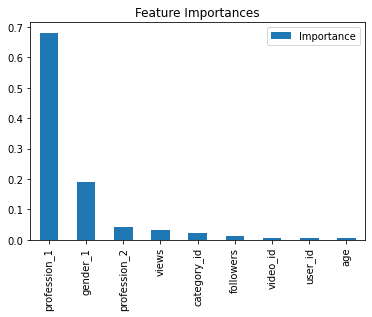

In [237]:
# Plotting the feature importance
df_feature_imp.plot(kind='bar', title='Feature Importances')

In [151]:
from sklearn.model_selection import GridSearchCV

### 'max_depth' 'min_child_weight'

In [159]:
# Base mdel for grid search
model = XGBRegressor(learning_rate =0.1, 
                      n_estimators=140,
                      max_depth=5,
                      min_child_weight=1,
                      gamma=0, 
                      subsample=0.8, 
                      colsample_bytree=0.8,         
                      nthread=4, 
                      scale_pos_weight=1, 
                      seed=27)

# Search parameters
param_test = {
    'max_depth':range(1,10),
    'min_child_weight':range(1,10)
}

# Setting search object
grid_search = GridSearchCV(estimator = model, 
                           param_grid = param_test, 
                           scoring='r2',
                           n_jobs=4,
                           cv=5)

# Perform search
grid_result = grid_search.fit(x_train, y_train)

# Saving the results
means = grid_result.cv_results_[ 'mean_test_score' ]
stds = grid_result.cv_results_[ 'std_test_score' ]
params = grid_result.cv_results_[ 'params' ]

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.373990 using {'max_depth': 9, 'min_child_weight': 1}


In [187]:
# Saving the best parameter
best_max_depth = 9
min_child_weight = 1

_Identified parameters_
* best_max_depth : 9
* min_child_weight : 1

### 'gamma'

In [183]:
# Base mdel for grid search
model = XGBRegressor(learning_rate =0.1, 
                      n_estimators=140,
                      max_depth=best_max_depth,
                      min_child_weight=min_child_weight,
                      gamma=0, 
                      subsample=0.8, 
                      colsample_bytree=0.8,         
                      nthread=4, 
                      scale_pos_weight=1, 
                      seed=27)

# Search parameters
param_test = {
    'gamma':np.linspace(0, 1, 11)
}

# Setting search object
grid_search = GridSearchCV(estimator = model, 
                           param_grid = param_test, 
                           scoring='r2',
                           n_jobs=4,
                           cv=5)

# Perform search
grid_result = grid_search.fit(x_train, y_train)

# Saving the results
means = grid_result.cv_results_[ 'mean_test_score' ]
stds = grid_result.cv_results_[ 'std_test_score' ]
params = grid_result.cv_results_[ 'params' ]

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.374952 using {'gamma': 0.2}


In [185]:
# Base mdel for grid search
model = XGBRegressor(learning_rate =0.1, 
                      n_estimators=140,
                      max_depth=best_max_depth,
                      min_child_weight=min_child_weight,
                      gamma=0, 
                      subsample=0.8, 
                      colsample_bytree=0.8,         
                      nthread=4, 
                      scale_pos_weight=1, 
                      seed=27)

# Search parameters
param_test = {
    'gamma':np.linspace(0.1, 0.3, 21)
}

# Setting search object
grid_search = GridSearchCV(estimator = model, 
                           param_grid = param_test, 
                           scoring='r2',
                           n_jobs=4,
                           cv=5)

# Perform search
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_[ 'mean_test_score' ]
stds = grid_result.cv_results_[ 'std_test_score' ]
params = grid_result.cv_results_[ 'params' ]

Best: 0.375513 using {'gamma': 0.24999999999999997}


In [188]:
# Saving the best parameter
best_gamma = 0.25

_Identified parameters_
* gamma : 0.25

### 'subsample' 'colsample_bytree'

In [196]:
# Base mdel for grid search
model = XGBRegressor(learning_rate =0.1, 
                      n_estimators=140,
                      max_depth=best_max_depth,
                      min_child_weight=min_child_weight,
                      gamma=best_gamma, 
                      subsample=0.8, 
                      colsample_bytree=0.8,         
                      nthread=4, 
                      scale_pos_weight=1, 
                      seed=27)

# Search parameters
param_test = {
    'subsample':np.linspace(0, 2.0, 21),
    'colsample_bytree':np.linspace(0, 2.0, 21)
}

# Setting search object
grid_search = GridSearchCV(estimator = model, 
                           param_grid = param_test, 
                           scoring='r2',
                           n_jobs=4,
                           cv=5)

# Perform search
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_[ 'mean_test_score' ]
stds = grid_result.cv_results_[ 'std_test_score' ]
params = grid_result.cv_results_[ 'params' ]

Best: 0.376852 using {'colsample_bytree': 0.7000000000000001, 'subsample': 1.0}


In [203]:
# Base mdel for grid search
model = XGBRegressor(learning_rate =0.1, 
                      n_estimators=140,
                      max_depth=best_max_depth,
                      min_child_weight=min_child_weight,
                      gamma=best_gamma, 
                      subsample=0.8, 
                      colsample_bytree=0.8,         
                      nthread=4, 
                      scale_pos_weight=1, 
                      seed=27)

# Search parameters
param_test = {
    'subsample':np.linspace(0.9, 1.1, 11),
    'colsample_bytree':np.linspace(0.6, 0.8, 11)
}

# Setting search object
grid_search = GridSearchCV(estimator = model, 
                           param_grid = param_test, 
                           scoring='r2',
                           n_jobs=4,
                           cv=5)

# Perform search
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_[ 'mean_test_score' ]
stds = grid_result.cv_results_[ 'std_test_score' ]
params = grid_result.cv_results_[ 'params' ]

Best: 0.376852 using {'colsample_bytree': 0.68, 'subsample': 1.0}


In [204]:
# Saving the best parameter
best_colsample_bytree = 0.68
best_subsample = 1.0

_Identified parameters_
* colsample_bytree = 0.68
* subsample = 1.0

### 'reg_alpha'

In [205]:
# Base mdel for grid search
model = XGBRegressor(learning_rate =0.1, 
                      n_estimators=140,
                      max_depth=best_max_depth,
                      min_child_weight=min_child_weight,
                      gamma=best_gamma, 
                      subsample=0.8, 
                      colsample_bytree=0.8,         
                      nthread=4, 
                      scale_pos_weight=1, 
                      seed=27)

# Search parameters
param_test = {
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

# Setting search object
grid_search = GridSearchCV(estimator = model, 
                           param_grid = param_test, 
                           scoring='r2',
                           n_jobs=4,
                           cv=5)

# Perform search
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_[ 'mean_test_score' ]
stds = grid_result.cv_results_[ 'std_test_score' ]
params = grid_result.cv_results_[ 'params' ]

Best: 0.375513 using {'reg_alpha': 1e-05}


* Not going to use reg_alpha

### learning_rate

In [214]:
# Base mdel for grid search
model = XGBRegressor(learning_rate =0.1, 
                      n_estimators=140,
                      max_depth=best_max_depth,
                      min_child_weight=min_child_weight,
                      gamma=best_gamma, 
                      subsample=0.8, 
                      colsample_bytree=0.8,         
                      nthread=4, 
                      scale_pos_weight=1, 
                      seed=27)

# Search parameters
param_test = {
    'learning_rate':np.linspace(0.01, 0.3, 21)
}

# Setting search object
grid_search = GridSearchCV(estimator = model, 
                           param_grid = param_test, 
                           scoring='r2',
                           n_jobs=4,
                           cv=5)

# Perform search
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_[ 'mean_test_score' ]
stds = grid_result.cv_results_[ 'std_test_score' ]
params = grid_result.cv_results_[ 'params' ]

Best: 0.374140 using {'learning_rate': 0.09699999999999999}


In [223]:
# Base mdel for grid search
model = XGBRegressor(learning_rate =0.1, 
                      n_estimators=140,
                      max_depth=best_max_depth,
                      min_child_weight=min_child_weight,
                      gamma=best_gamma, 
                      subsample=0.8, 
                      colsample_bytree=0.8,         
                      nthread=4, 
                      scale_pos_weight=1, 
                      seed=27)

# Search parameters
param_test = {
    'learning_rate':np.linspace(0.0825, 0.1115, 21)
}

# Setting search object
grid_search = GridSearchCV(estimator = model, 
                           param_grid = param_test, 
                           scoring='r2',
                           n_jobs=4,
                           cv=5)

# Perform search
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_[ 'mean_test_score' ]
stds = grid_result.cv_results_[ 'std_test_score' ]
params = grid_result.cv_results_[ 'params' ]

Best: 0.375158 using {'learning_rate': 0.08975}


_Identified parameters_
* gamma : 0.25
* colsample_bytree = 0.68
* subsample = 1.0

<AxesSubplot:title={'center':'Feature Importances'}>

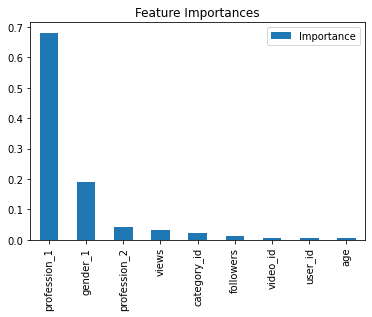

In [238]:
# Plotting the feature importance
df_feature_imp.plot(kind='bar', title='Feature Importances')

### Trying to build models after removing the features with less importance
    * age
    * user_id
    * video_id
    * followers

* We are only considering XGBoost it gave the best performance.

In [42]:
# Define a function to one hot encode, standardize, remove feature & split
def encode_standardize_split_remove(df_input, cols, remove_col):
    
    # Reseting index of input dataframe
    df_input = df_input.reset_index(drop=True)
    
    # creating one hot encoder object 
    onehotencoder = OneHotEncoder(drop='first')
    
    # define data
    data = df_input[cols]
    
    # Perform encoding
    data_encoded = onehotencoder.fit_transform(data).toarray()
    
    # Getting the new column names for one hot encoded data
    new_col = []
    for name in cols:
        unique_vals = df_input[name].unique()
        for count in range(len(unique_vals)-1):
            new_col.append(name +"_"+ str(count+1))
    
    # Generate encoded dataframe
    df_onehot = pd.DataFrame(data_encoded, columns = new_col)
    
    # Contact input dataframe with encoded dataframe
    df_input = pd.concat([df_input, df_onehot], axis=1)
    
    # Removing the orginial columns that were encoded
    df_input= df_input.drop(cols, axis=1)
    
    # Removing user specified columns
    df_input= df_input.drop(remove_col, axis=1)
    
    # Get target column data
    target_data = df_input['engagement_score']
    
    # Remove target column from dataframe
    df_input= df_input.drop(['engagement_score'], axis=1)
    
    # Get feature names
    feature_names = df_input.columns.values
    print("Feature column names : ", feature_names)
    print("\n")
    
    # Add the target data at last position of dataframe
    df_input['engagement_score'] = target_data
    
    # Creating an object of StandardScaler for performing our operations
    standardscaler = StandardScaler()

    # Extracting features
    features = df_input.iloc[:,:-1]

    # Extracting target
    target = df_input.iloc[:,-1:]

    # Transform data
    X = standardscaler.fit_transform(features)
    Y = standardscaler.fit_transform(target)
    
    # Splitting train and test
    x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.3, random_state=100)
    
    # Print the shape of train and validation
    print("Shape of x_train : ", x_train.shape)
    print("Shape of y_train : ", y_train.shape)
    print("Shape of x_val : ", x_val.shape)
    print("Shape of y_val : ", y_val.shape)
    
    # Return features and traget
    return x_train, x_val, y_train, y_val, standardscaler, feature_names

In [ ]:
# Function to Building Deep learning (ANN) model
def build_ANN():
    
    # initializing the model
    model = Sequential()
    
    # Layers
    model.add(Dense(units=128,activation='relu',kernel_initializer='uniform', input_dim = x_train.shape[1]))
    model.add(Dense(units=64, activation='relu', kernel_initializer='uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(units=32, activation='relu', kernel_initializer='uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal', activation='linear'))

    # Compile model
    model.compile(optimizer="adam", loss='mean_squared_error', metrics='mse')
    
    # Return ANN model
    return model

In [ ]:
tuned_XGB_model = XGBRegressor(learning_rate =0.1, 
                      n_estimators=140,
                      max_depth=best_max_depth,
                      min_child_weight=min_child_weight,
                      gamma=0.25, 
                      subsample= 1.0, 
                      colsample_bytree=0.68,         
                      nthread=4, 
                      scale_pos_weight=1, 
                      seed=27)

In [ ]:
# Listing the base model algorithms
base_algos = [tuned_XGB_model]

# Listing the names of the base model algorithms
model_names = ['Tuned XGBoost']

In [ ]:
from itertools import combinations

In [ ]:
def generate_combinations(item_list):
    item_list = set(item_list)
    combinations_list = []
    for n in range(len(item_list) + 1):
        tmp = combinations(item_list, n)
        combinations_list +=list(tmp)
    return combinations_list

In [360]:
def get_model_stats(base_algos, model_names):
    
    # Iterating over base algorithms
    for algo in base_algos:
        
        # Initializing model
        model = algo
        
        # Training model
        if model=='ANN':
            # Call ANN building function
            model = build_ANN()
            # Fitting ANN model
            model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size = 32, epochs = 50, verbose=0)
        else:
            model.fit(x_train, y_train)
        
        # Predicting for train values and calculaing R2 score
        train_pred = model.predict(x_train)
        train_score = r2_score(y_train, train_pred)
    
        # Predicting for validation values and calculaing R2 score
        val_pred = model.predict(x_val)
        val_score = r2_score(y_val, val_pred)
    
    # Return the model metrics
    return train_score, val_score

In [365]:
# Removing the combinations of least contributing columns and checking the model performance

# Listing the column names to be removed
combo_list = generate_combinations(['age', 'user_id', 'video_id', 'followers', 'category_id', 'views'])
remove_cols_list = []
train_score_list = []
test_score_list = []

for items in combo_list:
    remove_cols = list(items)
    # One hot encoding 'category_id' & 'video_id' along with 'gender' & 'profession'
    x_train, x_val, y_train, y_val, standardscaler, _ = encode_standardize_split_remove(df_wip, ['gender', 'profession'], remove_cols)

    # Calling the function to compare base models
    train_score, val_score = get_model_stats(base_algos, model_names)
    
    # Appending the stats
    remove_cols_list.append(items)
    train_score_list.append(train_score)
    test_score_list.append(val_score)

# Creating a dataframe for model metrics
df_metrics = pd.DataFrame({'Remove Col': remove_cols_list, 'Train R2 Score': train_score_list, 'Test R2 Score': test_score_list})

# Sorting the feature importance
df_metrics.sort_values(by=['Test R2 Score'], ascending=False , inplace=True)

# Print and check
df_metrics

Feature column names :  ['user_id' 'category_id' 'video_id' 'age' 'followers' 'views' 'gender_1'
 'profession_1' 'profession_2']


Shape of x_train :  (62437, 9)
Shape of y_train :  (62437, 1)
Shape of x_val :  (26760, 9)
Shape of y_val :  (26760, 1)
Feature column names :  ['user_id' 'category_id' 'video_id' 'age' 'views' 'gender_1'
 'profession_1' 'profession_2']


Shape of x_train :  (62437, 8)
Shape of y_train :  (62437, 1)
Shape of x_val :  (26760, 8)
Shape of y_val :  (26760, 1)
Feature column names :  ['user_id' 'video_id' 'age' 'followers' 'views' 'gender_1' 'profession_1'
 'profession_2']


Shape of x_train :  (62437, 8)
Shape of y_train :  (62437, 1)
Shape of x_val :  (26760, 8)
Shape of y_val :  (26760, 1)
Feature column names :  ['category_id' 'video_id' 'age' 'followers' 'views' 'gender_1'
 'profession_1' 'profession_2']


Shape of x_train :  (62437, 8)
Shape of y_train :  (62437, 1)
Shape of x_val :  (26760, 8)
Shape of y_val :  (26760, 1)
Feature column names :  ['user_i

Feature column names :  ['user_id' 'followers' 'views' 'gender_1' 'profession_1' 'profession_2']


Shape of x_train :  (62437, 6)
Shape of y_train :  (62437, 1)
Shape of x_val :  (26760, 6)
Shape of y_val :  (26760, 1)
Feature column names :  ['user_id' 'video_id' 'followers' 'gender_1' 'profession_1' 'profession_2']


Shape of x_train :  (62437, 6)
Shape of y_train :  (62437, 1)
Shape of x_val :  (26760, 6)
Shape of y_val :  (26760, 1)
Feature column names :  ['category_id' 'age' 'followers' 'gender_1' 'profession_1' 'profession_2']


Shape of x_train :  (62437, 6)
Shape of y_train :  (62437, 1)
Shape of x_val :  (26760, 6)
Shape of y_val :  (26760, 1)
Feature column names :  ['category_id' 'followers' 'views' 'gender_1' 'profession_1'
 'profession_2']


Shape of x_train :  (62437, 6)
Shape of y_train :  (62437, 1)
Shape of x_val :  (26760, 6)
Shape of y_val :  (26760, 1)
Feature column names :  ['category_id' 'video_id' 'followers' 'gender_1' 'profession_1'
 'profession_2']


Shape o

,Remove Col,Train R2 Score,Test R2 Score
11,"(followers, age)",0.465993,0.379475
1,"(followers,)",0.515743,0.379452
0,(),0.522736,0.379140
21,"(views, age)",0.467302,0.378717
2,"(category_id,)",0.509992,0.378426
...,...,...,...
52,"(category_id, user_id, video_id, views)",0.306123,0.293093
45,"(followers, category_id, video_id, views)",0.332719,0.281319
60,"(followers, category_id, video_id, views, age)",0.309455,0.275460
63,"(followers, category_id, user_id, video_id, vi...",0.257675,0.261927


In [379]:
from sklearn.decomposition import PCA

In [398]:
# Performing preprocessing operations using function
x_train, x_val, y_train, y_val, standardscaler, _ = encode_standardize_split(df_wip, ['gender', 'profession'])

Feature column names :  ['user_id' 'category_id' 'video_id' 'age' 'followers' 'views' 'gender_1'
 'profession_1' 'profession_2']


Shape of x_train :  (62437, 9)
Shape of y_train :  (62437, 1)
Shape of x_val :  (26760, 9)
Shape of y_val :  (26760, 1)


In [399]:
# Apply PCA on the train
pca=PCA(0.98, svd_solver='auto')
pca.fit(x_train)

# Displays the cumulative sum of the variance explained by all the features
np.cumsum(pca.explained_variance_ratio_*100)

array([ 23.9410709 ,  41.69149192,  56.39379548,  67.53777362,
        78.65815628,  85.99530372,  93.11639525,  97.73611254,
       100.        ])

In [400]:
pca.n_components_

9

In [401]:
# Performing PCA in the features

# Transforming training data
x_train=pca.transform(x_train)

# Transforming validation data
x_val=pca.transform(x_val)

# Calling the function to compare base models
df_eval = compare_models(base_algos, model_names)

# Print and check
df_eval

START...
Running :  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.68,
             enable_categorical=False, gamma=0.25, gpu_id=-1,
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=9,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=140, n_jobs=4, nthread=4, num_parallel_tree=1,
             predictor='auto', random_state=27, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=27, subsample=1.0, tree_method='exact',
             validate_parameters=1, verbosity=None)
Completed...!


,Model,Train R2 Score,Test R2 Score
0,Tuned XGBoost,0.537368,0.349536


### Removing outliers

<AxesSubplot:xlabel='engagement_score'>

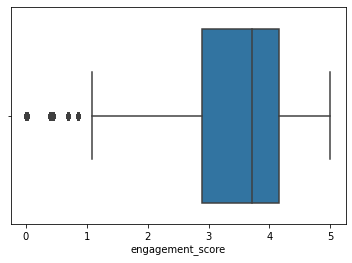

In [37]:
# Creating a copy of df_wip
df_wip2 = df_wip.copy(deep=True)

# Visualizing the boxplot to see the outliers in 'engagement_score'
sns.boxplot(df_wip2["engagement_score"])

In [38]:
# Calculating IQR
Q1 = np.percentile(df_wip2['engagement_score'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df_wip2['engagement_score'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

# Lower bound
lower = Q1-1.5*IQR

# Upper bound
upper = Q3+1.5*IQR

# Print the upper and lower limits
print('Lpper limit : ', lower)
print('Upper limit : ', upper)

Lpper limit :  1.0250000000000004
Upper limit :  6.025


In [39]:
# Checking shape before removing outliers
print("Shape before outlier removal : ", df_wip2.shape)

# Removing outlier in engagement_score
df_wip2.drop(df_wip2[(df_wip2.engagement_score < lower) | (df_wip2.engagement_score > upper)].index , inplace=True)

# Print and check
df_wip2

Shape before outlier removal :  (89197, 9)


,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,19990,37,128,24,Male,Student,180,1000,4.33
1,5304,32,132,14,Female,Student,330,714,1.79
2,1840,12,24,19,Male,Student,180,138,4.35
3,12597,23,112,19,Male,Student,220,613,3.77
4,13626,23,112,27,Male,Working Professional,220,613,3.13
...,...,...,...,...,...,...,...,...,...
89192,23996,15,32,25,Male,Other,340,662,3.91
89193,20466,20,47,31,Male,Other,240,892,3.56
89194,13655,16,97,25,Male,Student,270,462,4.23
89195,24840,9,18,35,Male,Working Professional,230,819,3.77


In [40]:
# Performing preprocessing operations using function
x_train, x_val, y_train, y_val, standardscaler, _ = encode_standardize_split(df_wip2, ['gender', 'profession'])

# Calling the function to compare base models
df_eval = compare_models(base_algos, model_names)

# Print and check
df_eval

Feature column names :  ['user_id' 'category_id' 'video_id' 'age' 'followers' 'views' 'gender_1'
 'profession_1' 'profession_2']


Shape of x_train :  (61863, 9)
Shape of y_train :  (61863, 1)
Shape of x_val :  (26514, 9)
Shape of y_val :  (26514, 1)
START...
Running :  LinearRegression()
Running :  Ridge()
Running :  Lasso()
Running :  KNeighborsRegressor()
Running :  DecisionTreeRegressor()
Running :  RandomForestRegressor()
Running :  AdaBoostRegressor()
Running :  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scal

,Model,Train R2 Score,Test R2 Score
0,Linear Regression,0.275907,2.675443e-01
1,Ridge Regression,0.275907,2.675446e-01
2,Lasso Regression,0.000000,-3.072076e-08
3,K Neighbors Regressor,0.511010,2.518443e-01
4,Decision Tree Regressor,1.000000,-1.120279e-01
5,Random Forest Regressor,0.910188,3.490309e-01
6,AdaBoost Regressor,0.250832,2.431059e-01
7,XGBoost Regressor,0.463066,3.589636e-01
8,ANN Model,0.378959,3.326831e-01


In [544]:
# Print and check
df_feature_imp

,Importance
profession_1,0.681546
gender_1,0.190844
profession_2,0.040498
views,0.033535
category_id,0.023343
followers,0.011456
video_id,0.007225
user_id,0.006256
age,0.005296


In [553]:
# Removing the combinations of least contributing columns and checking the model performance

# Listing the column names to be removed
combo_list = generate_combinations(['age', 'user_id', 'video_id', 'followers'])
remove_cols_list = []
train_score_list = []
test_score_list = []

for items in combo_list:
    remove_cols = list(items)
    # One hot encoding 'category_id' & 'video_id' along with 'gender' & 'profession'
    x_train, x_val, y_train, y_val, standardscaler, _ = encode_standardize_split_remove(df_wip2, ['gender', 'profession'], remove_cols)

    # Calling the function to compare base models
    train_score, val_score = get_model_stats(base_algos, model_names)
    
    # Appending the stats
    remove_cols_list.append(items)
    train_score_list.append(train_score)
    test_score_list.append(val_score)

# Creating a dataframe for model metrics
df_metrics = pd.DataFrame({'Remove Col': remove_cols_list, 'Train R2 Score': train_score_list, 'Test R2 Score': test_score_list})

# Sorting the feature importance
df_metrics.sort_values(by=['Test R2 Score'], ascending=False , inplace=True)

# Print and check
df_metrics

Feature column names :  ['index' 'user_id' 'category_id' 'video_id' 'age' 'followers' 'views'
 'gender_1' 'profession_1' 'profession_2']


Shape of x_train :  (61863, 10)
Shape of y_train :  (61863, 1)
Shape of x_val :  (26514, 10)
Shape of y_val :  (26514, 1)
Feature column names :  ['index' 'category_id' 'video_id' 'age' 'followers' 'views' 'gender_1'
 'profession_1' 'profession_2']


Shape of x_train :  (61863, 9)
Shape of y_train :  (61863, 1)
Shape of x_val :  (26514, 9)
Shape of y_val :  (26514, 1)
Feature column names :  ['index' 'user_id' 'category_id' 'age' 'followers' 'views' 'gender_1'
 'profession_1' 'profession_2']


Shape of x_train :  (61863, 9)
Shape of y_train :  (61863, 1)
Shape of x_val :  (26514, 9)
Shape of y_val :  (26514, 1)
Feature column names :  ['index' 'user_id' 'category_id' 'video_id' 'age' 'views' 'gender_1'
 'profession_1' 'profession_2']


Shape of x_train :  (61863, 9)
Shape of y_train :  (61863, 1)
Shape of x_val :  (26514, 9)
Shape of y_val :  (26514

,Remove Col,Train R2 Score,Test R2 Score
3,"(followers,)",0.535543,0.378411
0,(),0.537268,0.377726
4,"(age,)",0.509822,0.374656
10,"(followers, age)",0.505274,0.374582
2,"(video_id,)",0.517886,0.374447
8,"(video_id, followers)",0.511755,0.370230
9,"(video_id, age)",0.489304,0.369330
14,"(video_id, followers, age)",0.479903,0.368697
13,"(user_id, followers, age)",0.439583,0.360706
7,"(user_id, age)",0.453047,0.357806


### Checking for outliners for 2nd time

<AxesSubplot:xlabel='engagement_score'>

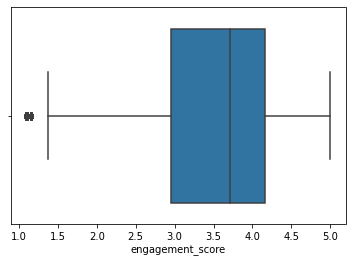

In [547]:
# Creating a copy of df_wip
df_wip3 = df_wip2.copy(deep=True)

# Visualizing the boxplot to see the outliers in 'engagement_score'
sns.boxplot(df_wip3["engagement_score"])

In [548]:
# Calculating IQR
Q1 = np.percentile(df_wip3['engagement_score'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df_wip3['engagement_score'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

# Lower bound
lower = Q1-1.5*IQR

# Upper bound
upper = Q3+1.5*IQR

# Print the upper and lower limits
print('Lpper limit : ', lower)
print('Upper limit : ', upper)

Lpper limit :  1.1599999999999997
Upper limit :  5.960000000000001


In [549]:
# Checking shape before removing outliers
print("Shape before outlier removal : ", df_wip3.shape)

# Removing outlier in engagement_score
df_wip3.drop(df_wip3[(df_wip3.engagement_score < lower) | (df_wip3.engagement_score > upper)].index , inplace=True)

# Print and check
df_wip3

Shape before outlier removal :  (88377, 9)


,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,19990,37,128,24,Male,Student,180,1000,4.33
1,5304,32,132,14,Female,Student,330,714,1.79
2,1840,12,24,19,Male,Student,180,138,4.35
3,12597,23,112,19,Male,Student,220,613,3.77
4,13626,23,112,27,Male,Working Professional,220,613,3.13
...,...,...,...,...,...,...,...,...,...
89192,23996,15,32,25,Male,Other,340,662,3.91
89193,20466,20,47,31,Male,Other,240,892,3.56
89194,13655,16,97,25,Male,Student,270,462,4.23
89195,24840,9,18,35,Male,Working Professional,230,819,3.77


In [551]:
# Performing preprocessing operations using function
x_train, x_val, y_train, y_val, standardscaler, _ = encode_standardize_split(df_wip3, ['gender', 'profession'])

# Calling the function to compare base models
df_eval = compare_models(base_algos, model_names)

# Print and check
df_eval

Feature column names :  ['user_id' 'category_id' 'video_id' 'age' 'followers' 'views' 'gender_1'
 'profession_1' 'profession_2']


Shape of x_train :  (61425, 9)
Shape of y_train :  (61425, 1)
Shape of x_val :  (26326, 9)
Shape of y_val :  (26326, 1)
START...
Running :  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.68,
             enable_categorical=False, gamma=0.25, gpu_id=-1,
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=9,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=140, n_jobs=4, nthread=4, num_parallel_tree=1,
             predictor='auto', random_state=27, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=27, subsample=1.0, tree_method='exact',
             validate_parameters=1, verbosity=None)
Completed...!


,Model,Train R2 Score,Test R2 Score
0,Tuned XGBoost,0.518038,0.377883


In [552]:
# Removing the combinations of least contributing columns and checking the model performance

# Listing the column names to be removed
combo_list = generate_combinations(['age', 'user_id', 'video_id', 'followers'])
remove_cols_list = []
train_score_list = []
test_score_list = []

for items in combo_list:
    remove_cols = list(items)
    # One hot encoding 'category_id' & 'video_id' along with 'gender' & 'profession'
    x_train, x_val, y_train, y_val, standardscaler, _ = encode_standardize_split_remove(df_wip3, ['gender', 'profession'], remove_cols)

    # Calling the function to compare base models
    train_score, val_score = get_model_stats(base_algos, model_names)
    
    # Appending the stats
    remove_cols_list.append(items)
    train_score_list.append(train_score)
    test_score_list.append(val_score)

# Creating a dataframe for model metrics
df_metrics = pd.DataFrame({'Remove Col': remove_cols_list, 'Train R2 Score': train_score_list, 'Test R2 Score': test_score_list})

# Sorting the feature importance
df_metrics.sort_values(by=['Test R2 Score'], ascending=False , inplace=True)

# Print and check
df_metrics

Feature column names :  ['index' 'user_id' 'category_id' 'video_id' 'age' 'followers' 'views'
 'gender_1' 'profession_1' 'profession_2']


Shape of x_train :  (61425, 10)
Shape of y_train :  (61425, 1)
Shape of x_val :  (26326, 10)
Shape of y_val :  (26326, 1)
Feature column names :  ['index' 'category_id' 'video_id' 'age' 'followers' 'views' 'gender_1'
 'profession_1' 'profession_2']


Shape of x_train :  (61425, 9)
Shape of y_train :  (61425, 1)
Shape of x_val :  (26326, 9)
Shape of y_val :  (26326, 1)
Feature column names :  ['index' 'user_id' 'category_id' 'age' 'followers' 'views' 'gender_1'
 'profession_1' 'profession_2']


Shape of x_train :  (61425, 9)
Shape of y_train :  (61425, 1)
Shape of x_val :  (26326, 9)
Shape of y_val :  (26326, 1)
Feature column names :  ['index' 'user_id' 'category_id' 'video_id' 'age' 'views' 'gender_1'
 'profession_1' 'profession_2']


Shape of x_train :  (61425, 9)
Shape of y_train :  (61425, 1)
Shape of x_val :  (26326, 9)
Shape of y_val :  (26326

,Remove Col,Train R2 Score,Test R2 Score
3,"(followers,)",0.546059,0.364532
4,"(age,)",0.518243,0.364044
0,(),0.543658,0.363015
2,"(video_id,)",0.523955,0.362376
10,"(followers, age)",0.511317,0.360975
8,"(video_id, followers)",0.511505,0.358034
14,"(video_id, followers, age)",0.489637,0.356893
9,"(video_id, age)",0.494019,0.355650
13,"(user_id, followers, age)",0.444785,0.348681
7,"(user_id, age)",0.457818,0.347999


### Binning

In [556]:
# Creating a copy of df_wip2 (data after removing outliers)
df_wip4 = df_wip2.copy(deep=True)

df_wip4.describe()

,user_id,category_id,video_id,age,followers,views,engagement_score
count,88377.000000,88377.000000,88377.000000,88377.000000,88377.000000,88377.00000,88377.000000
mean,13879.915385,18.271405,77.600948,24.818935,252.460482,502.17113,3.516250
std,8006.288409,11.662622,48.495888,8.947729,46.108309,268.46069,0.814642
min,1.000000,1.000000,1.000000,10.000000,160.000000,30.00000,1.090000
25%,6942.000000,8.000000,34.000000,18.000000,230.000000,229.00000,2.960000
50%,13891.000000,16.000000,75.000000,23.000000,240.000000,467.00000,3.710000
75%,20817.000000,26.000000,119.000000,32.000000,280.000000,714.00000,4.160000
max,27734.000000,47.000000,175.000000,68.000000,360.000000,1000.00000,5.000000


* Bin -->       age, followers, views
* age -->       10 - 68
* followers --> 160 - 360
* views -->     30 - 1000

In [574]:
# Binning age into 5 categories (10 - 68)
bins = [0, 16, 35, 40, 60, 120]
labels =['Child', 'Youth', 'Middle age', 'Adults', 'Senior']
df_wip4['age_binned'] = pd.cut(df_wip4['age'], bins, labels=labels)
df_wip4.drop(['age'], axis = 1, inplace=True)
df_wip4

,user_id,category_id,video_id,gender,profession,followers,views,engagement_score,age_binned,followers_binned,views_binned
0,19990,37,128,Male,Student,180,1000,4.33,Youth,lower_mid,high
1,5304,32,132,Female,Student,330,714,1.79,Child,high,high
2,1840,12,24,Male,Student,180,138,4.35,Youth,lower_mid,Low
3,12597,23,112,Male,Student,220,613,3.77,Youth,higher_mid,high
4,13626,23,112,Male,Working Professional,220,613,3.13,Youth,higher_mid,high
...,...,...,...,...,...,...,...,...,...,...,...
89192,23996,15,32,Male,Other,340,662,3.91,Youth,high,high
89193,20466,20,47,Male,Other,240,892,3.56,Youth,higher_mid,high
89194,13655,16,97,Male,Student,270,462,4.23,Youth,higher_mid,mid
89195,24840,9,18,Male,Working Professional,230,819,3.77,Youth,higher_mid,high


In [575]:
# Binning age into 5 categories (160 - 360)
bins = [0, 100, 200, 300, 400, 500]
labels =['Low', 'lower_mid', 'higher_mid', 'high', 'very_high']
df_wip4['followers_binned'] = pd.cut(df_wip4['followers'], bins, labels=labels)
df_wip4.drop(['followers'], axis = 1, inplace=True)
df_wip4

,user_id,category_id,video_id,gender,profession,views,engagement_score,age_binned,followers_binned,views_binned
0,19990,37,128,Male,Student,1000,4.33,Youth,lower_mid,high
1,5304,32,132,Female,Student,714,1.79,Child,high,high
2,1840,12,24,Male,Student,138,4.35,Youth,lower_mid,Low
3,12597,23,112,Male,Student,613,3.77,Youth,higher_mid,high
4,13626,23,112,Male,Working Professional,613,3.13,Youth,higher_mid,high
...,...,...,...,...,...,...,...,...,...,...
89192,23996,15,32,Male,Other,662,3.91,Youth,high,high
89193,20466,20,47,Male,Other,892,3.56,Youth,higher_mid,high
89194,13655,16,97,Male,Student,462,4.23,Youth,higher_mid,mid
89195,24840,9,18,Male,Working Professional,819,3.77,Youth,higher_mid,high


In [576]:
# Binning age into 5 categories (30 - 1000)
bins = [0, 250, 500, 1000, 1500]
labels =['Low', 'mid', 'high', 'very high']
df_wip4['views_binned'] = pd.cut(df_wip4['views'], bins, labels=labels)
df_wip4.drop(['views'], axis = 1, inplace=True)
df_wip4

,user_id,category_id,video_id,gender,profession,engagement_score,age_binned,followers_binned,views_binned
0,19990,37,128,Male,Student,4.33,Youth,lower_mid,high
1,5304,32,132,Female,Student,1.79,Child,high,high
2,1840,12,24,Male,Student,4.35,Youth,lower_mid,Low
3,12597,23,112,Male,Student,3.77,Youth,higher_mid,high
4,13626,23,112,Male,Working Professional,3.13,Youth,higher_mid,high
...,...,...,...,...,...,...,...,...,...
89192,23996,15,32,Male,Other,3.91,Youth,high,high
89193,20466,20,47,Male,Other,3.56,Youth,higher_mid,high
89194,13655,16,97,Male,Student,4.23,Youth,higher_mid,mid
89195,24840,9,18,Male,Working Professional,3.77,Youth,higher_mid,high


In [585]:
# Performing preprocessing operations using function
x_train, x_val, y_train, y_val, standardscaler, feature_names = encode_standardize_split(df_wip4, ['gender', 'profession', 'age_binned', 'followers_binned', 'views_binned'])

# Calling the function to compare base models
df_eval = compare_models(base_algos, model_names)

# Print and check
df_eval

Feature column names :  ['user_id' 'category_id' 'video_id' 'gender_1' 'profession_1'
 'profession_2' 'age_binned_1' 'age_binned_2' 'age_binned_3'
 'age_binned_4' 'followers_binned_1' 'followers_binned_2' 'views_binned_1'
 'views_binned_2']


Shape of x_train :  (61863, 14)
Shape of y_train :  (61863, 1)
Shape of x_val :  (26514, 14)
Shape of y_val :  (26514, 1)
START...
Running :  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.68,
             enable_categorical=False, gamma=0.25, gpu_id=-1,
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=9,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=140, n_jobs=4, nthread=4, num_parallel_tree=1,
             predictor='auto', random_state=27, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=27, subsample=1.0, tree_method='exact',
    

,Model,Train R2 Score,Test R2 Score
0,Tuned XGBoost,0.463181,0.386889


### Getting feature importance for binned data

In [587]:
model = XGBRegressor(learning_rate =0.1, 
                      n_estimators=140,
                      max_depth=best_max_depth,
                      min_child_weight=min_child_weight,
                      gamma=0.25, 
                      subsample= 1.0, 
                      colsample_bytree=0.68,         
                      nthread=4, 
                      scale_pos_weight=1, 
                      seed=27)

# Training model
model.fit(x_train, y_train, eval_metric='mae')

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.68,
             enable_categorical=False, gamma=0.25, gpu_id=-1,
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=9,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=140, n_jobs=4, nthread=4, num_parallel_tree=1,
             predictor='auto', random_state=27, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=27, subsample=1.0, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [588]:
# Predicting for train values and calculaing R2 score
train_pred = model.predict(x_train)
train_score = r2_score(y_train, train_pred)
print("Train Score :\t\t", train_score)
    
# Predicting for validation values and calculaing R2 score
val_pred = model.predict(x_val)
val_score = r2_score(y_val, val_pred)
print("Validation Score :\t", val_score)

Train Score :		 0.46318100696471076
Validation Score :	 0.3868891074242068


In [592]:
# Getting feature importance values and feature names
feature_imp = model.feature_importances_
df_feature_imp = pd.DataFrame(feature_names)

# Define a dictionary containing Students data
data = {'Frature Name': feature_names,
        'Importance': feature_imp}

# Convert the dictionary into DataFrame
df_feature_imp = pd.DataFrame(feature_imp, columns=['Importance'], index=feature_names)

# Sorting the feature importance
df_feature_imp.sort_values(by=['Importance'], ascending=False , inplace=True)

# Print and check
df_feature_imp

,Importance
gender_1,0.460825
profession_1,0.333343
profession_2,0.082351
category_id,0.024980
views_binned_2,0.017862
views_binned_1,0.016600
followers_binned_1,0.011193
age_binned_1,0.011046
video_id,0.009955
user_id,0.009569


<AxesSubplot:title={'center':'Feature Importances'}>

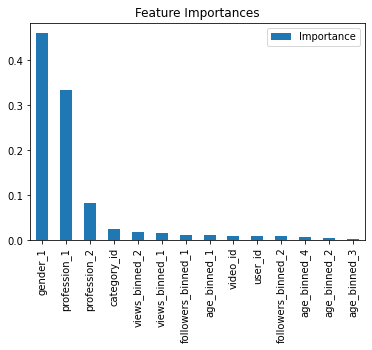

In [593]:
# Plotting the feature importance
df_feature_imp.plot(kind='bar', title='Feature Importances')

### Remove age and followers before binning

In [595]:
# Creating a copy of df_wip2 (data after removing outliers)
df_wip5 = df_wip2.copy(deep=True)

# Binning age into 5 categories (30 - 1000)
bins = [0, 250, 500, 1000, 1500]
labels =['Low', 'mid', 'high', 'very high']
df_wip5['views_binned'] = pd.cut(df_wip5['views'], bins, labels=labels)
df_wip5.drop(['views'], axis = 1, inplace=True)
df_wip5.drop(['age'], axis = 1, inplace=True)
df_wip5.drop(['followers'], axis = 1, inplace=True)
df_wip5

,user_id,category_id,video_id,gender,profession,engagement_score,views_binned
0,19990,37,128,Male,Student,4.33,high
1,5304,32,132,Female,Student,1.79,high
2,1840,12,24,Male,Student,4.35,Low
3,12597,23,112,Male,Student,3.77,high
4,13626,23,112,Male,Working Professional,3.13,high
...,...,...,...,...,...,...,...
89192,23996,15,32,Male,Other,3.91,high
89193,20466,20,47,Male,Other,3.56,high
89194,13655,16,97,Male,Student,4.23,mid
89195,24840,9,18,Male,Working Professional,3.77,high


In [596]:
# Performing preprocessing operations using function
x_train, x_val, y_train, y_val, standardscaler, feature_names = encode_standardize_split(df_wip5, ['gender', 'profession', 'views_binned'])

# Calling the function to compare base models
df_eval = compare_models(base_algos, model_names)

# Print and check
df_eval

Feature column names :  ['user_id' 'category_id' 'video_id' 'gender_1' 'profession_1'
 'profession_2' 'views_binned_1' 'views_binned_2']


Shape of x_train :  (61863, 8)
Shape of y_train :  (61863, 1)
Shape of x_val :  (26514, 8)
Shape of y_val :  (26514, 1)
START...
Running :  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.68,
             enable_categorical=False, gamma=0.25, gpu_id=-1,
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=9,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=140, n_jobs=4, nthread=4, num_parallel_tree=1,
             predictor='auto', random_state=27, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=27, subsample=1.0, tree_method='exact',
             validate_parameters=1, verbosity=None)
Completed...!


,Model,Train R2 Score,Test R2 Score
0,Tuned XGBoost,0.461735,0.386462
